In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
###Determining the tone of the text of reviews of films from IMDb (Internet Movie Database)
max_words=10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_words)

In [3]:
###Training data preparation
maxlen = 200
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [4]:
###Create neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, 8, input_length=maxlen))
model.add(tf.keras.layers.LSTM(32, recurrent_dropout = 0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 24s 139ms/step - loss: 0.6549 - accuracy: 0.5778 - val_loss: 0.4457 - val_accuracy: 0.8116
Epoch 2/15
176/176 [==============================] - 24s 136ms/step - loss: 0.5371 - accuracy: 0.7126 - val_loss: 0.5755 - val_accuracy: 0.7116
Epoch 3/15
176/176 [==============================] - 24s 137ms/step - loss: 0.3954 - accuracy: 0.8407 - val_loss: 0.3235 - val_accuracy: 0.8724
Epoch 4/15
176/176 [==============================] - 24s 137ms/step - loss: 0.2600 - accuracy: 0.9041 - val_loss: 0.3193 - val_accuracy: 0.8768
Epoch 5/15
176/176 [==============================] - 24s 136ms/step - loss: 0.2273 - accuracy: 0.9217 - val_loss: 0.3109 - val_accuracy: 0.8728
Epoch 6/15
176/176 [==============================] - 24s 137ms/step - loss: 0.1926 - accuracy: 0.9351 - val_loss: 0.3302 - val_accuracy: 0.8812
Epoch 7/15
176/176 [==============================] - 24s 136ms/step - loss: 0.1669 - accuracy: 0.9487 - val_loss: 0.3104 - val_ac

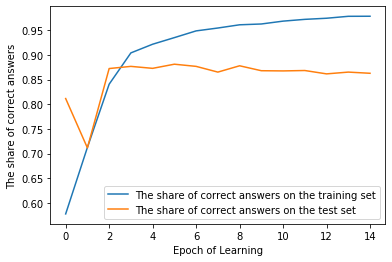

In [7]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [8]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 11s 14ms/step - loss: 0.4855 - accuracy: 0.8540
